# Geopandas

Geopandas is a library that makes plotting geospatial data very easy. It combines the powers of pandas dataframe with the ability to manipulate spatial data using *shapely*. 

In these plots, shape data is read in in the form of a shape file. The world map shape file contains both geometry information, that is used to plot the map, as well as other attributes like gdp, population estimate etc. for every country. 

## GDP PER CAPITA of the nations of the world

Looking at the color map of the GDP PER CAPITA, it looks like most of the nations of the world have a similar wealth distribution per capita. If the population was redistributed equally among the nations would everybody be equally rich?

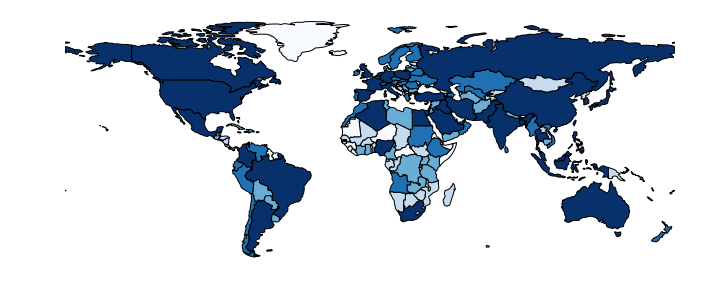

In [66]:
import pandas as pd
import geopandas
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline


world = geopandas.read_file("zip://./ne_110m_admin_0_countries.zip")
world = world[(world.POP_EST>0) & (world.NAME_EN!="Antarctica")]
world['gdp_per_cap'] = world.GDP_MD_EST / world.POP_EST
f, ax = plt.subplots(1, figsize=(12, 18))
ax = world.plot(column=world.GDP_MD_EST,cmap='Blues',scheme='quantiles',edgecolor='black',ax=ax)
ax.set_axis_off()

## India GDP per capita of every state

From the plot below its clear the more popolus states in the north are not contributing much to the GDP. No wonder then that the new GST introduction has been so debated. With the lesser populus states earning more revenue than the more populus ones, there certainly will be some loss of revenue if the center does not compensate for the loss.

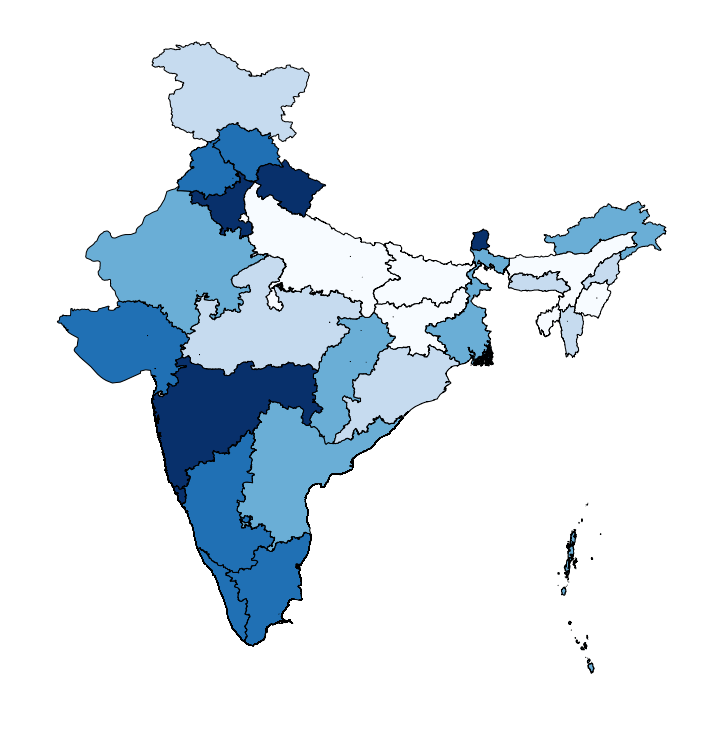

In [111]:
india = geopandas.read_file("zip://data/India_SHP.zip")
india.set_index(['ST_NAME'],inplace=True)
india_gdp = pd.read_csv('data/GDP.csv')

india_gdp.set_index(['ST_NAME'],inplace=True)
india['GDP_PER_CAP']=pd.Series(india_gdp.GDP_PER_CAP,index=india.index)
india.dropna(axis=0,inplace=True)

f, ax = plt.subplots(1, figsize=(12, 18))
ax = india.plot(column=india.GDP_PER_CAP,cmap='Blues',scheme='quantiles',edgecolor='black',ax=ax)
ax.set_axis_off()
